In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('petrol_consumption.csv')

In [3]:
df.shape

(48, 5)

In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

<AxesSubplot:>

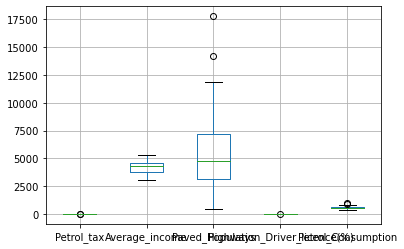

In [7]:
df.boxplot()

In [8]:
x = df.drop('Petrol_Consumption', axis = 1)
y = df['Petrol_Consumption']

In [9]:
print('X is:\n', x.head(2))
print('Y is:\n', y.head(2))

X is:
    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
0         9.0            3571            1976                         0.525
1         9.0            4092            1250                         0.572
Y is:
 0    541
1    524
Name: Petrol_Consumption, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 111)

In [11]:
print('Train Size is', x_train.shape)
print('Test Size is', x_test.shape)

Train Size is (38, 4)
Test Size is (10, 4)


In [13]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor() #criterion='mse' or criterion='mae' uses linear model to generate these errors

In [14]:
model = reg.fit(x_train, y_train)
model

DecisionTreeRegressor()

In [15]:
y_pred = model.predict(x_test)
y_pred[:10]

array([640., 704., 554., 524., 508., 566., 561., 628., 704., 566.])

In [16]:
comp = pd.DataFrame({'Actual':y_test, "Predicted":y_pred, 'Residual': y_test - y_pred})
comp

,Actual,Predicted,Residual
27,631,640.0,-9.0
46,610,704.0,-94.0
30,571,554.0,17.0
23,547,524.0,23.0
16,603,508.0,95.0
29,534,566.0,-32.0
0,541,561.0,-20.0
17,714,628.0,86.0
42,632,704.0,-72.0
34,487,566.0,-79.0


In [17]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

52.7
3900.5
62.45398305952952


In [18]:
y_pred.mean()

595.5